## Some tests for filtering

In [1]:
from Thymio import Thymio
from Filtering import Filtering
from Robot import Robot
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
Ts = 0.1
phi = 0

A = np.eye(2)
B = np.array([Ts,0])

robot = Robot(A,B)

Rvel = np.eye(2)*0.5
Rcam = np.eye(2)*0.1
Q = np.eye(2)*0.04
Hvel = np.array([10, 0.0001])


In [3]:
Kalman = Filtering(Rvel,Rcam,Q,robot,Hvel)

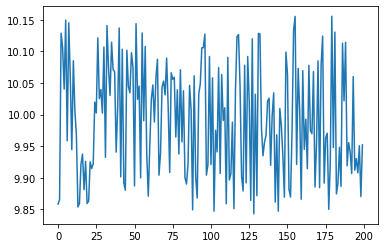

In [16]:
v_target = 10 #mm/s
v_noisy = []
Xreal = []
Xnoisy = []
Xest = []
pos = 0

for i in np.arange(0,20,Ts):
    v_noisy = v_target + (np.random.rand(200)-0.5)*m.sqrt(0.5)
    v_noisy2 = v_target + (np.random.rand(200)-0.5)*m.sqrt(0.1)
    Xreal.append(np.array([v_noisy2[int(i*10)]*i,0]))
    Xnoisy.append(np.array([v_noisy[int(i*10)]*i,0.]))




In [17]:
for i in range(0,200):
    Xest.append(Kalman.kalmanRectiligne(Xreal[i], Xnoisy[i], v_target, v_noisy[i]))

In [18]:
X = []
for i in range(0,200):
    X.append(Xest[i][0])

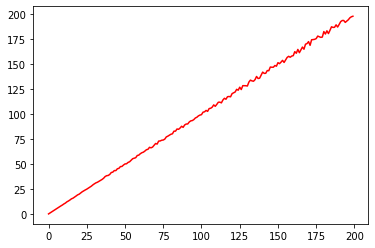

In [19]:
plt.plot(X,'r')
